In [1]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import itertools
import random

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import euclidean

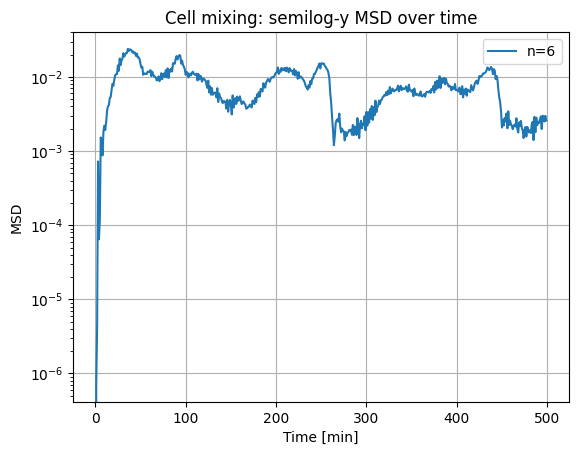

In [15]:
# plot MSD for turbulence motion

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000_motion_path.json", 'r') as f1:
    motion_data = json.load(f1)

# Function to calculate squared displacement
def calculate_squared_displacement(data):
    squared_displacement = {}
    for cell, positions in data.items():
        squared_displacement[cell] = [0]  # Initialize with 0 displacement for the first time step
        prev_position = np.array(positions[0])
        for position in positions[1:]:
            current_position = np.array(position)
            displacement = np.linalg.norm(current_position - prev_position)**2
            squared_displacement[cell].append(displacement)
            prev_position = current_position
    return squared_displacement

# Function to average squared displacement over cells
def average_squared_displacement(data):
    num_time_steps = len(next(iter(data.values())))
    avg_squared_displacement = [0] * num_time_steps
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell_positions in data.values():
            total_squared_displacement += cell_positions[time_step]
        avg_squared_displacement[time_step] = total_squared_displacement / len(data)
    return avg_squared_displacement

# Calculate squared displacement for each cell
squared_displacement_data = calculate_squared_displacement(motion_data)

# Average squared displacement over cells
avg_squared_displacement = average_squared_displacement(squared_displacement_data)

# Plotting
time_steps = range(len(avg_squared_displacement))
plt.semilogy(time_steps, avg_squared_displacement, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: semilog-y MSD over time")
plt.legend()
plt.grid(True)
plt.show()


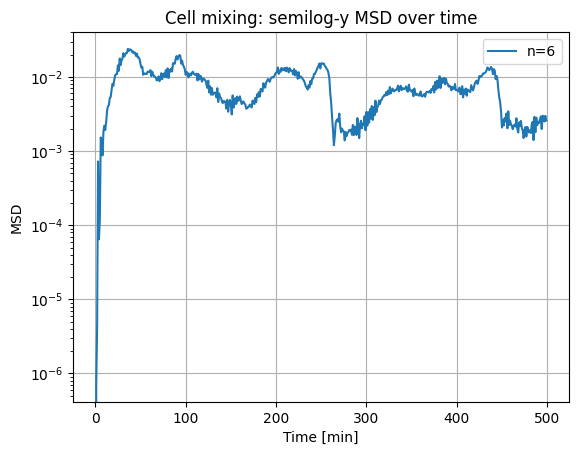

In [18]:
# plot MSD for turbulence motion

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed10_motion_path.json", 'r') as f1:
    motion_data = json.load(f1)

# Function to calculate squared displacement
def calculate_squared_displacement(data):
    squared_displacement = {}
    for cell, positions in data.items():
        squared_displacement[cell] = [0]  # Initialize with 0 displacement for the first time step
        prev_position = np.array(positions[0])
        for position in positions[1:]:
            current_position = np.array(position)
            displacement = np.linalg.norm(current_position - prev_position)**2
            squared_displacement[cell].append(displacement)
            prev_position = current_position
    return squared_displacement

# Function to average squared displacement over cells
def average_squared_displacement(data):
    num_time_steps = len(next(iter(data.values())))
    avg_squared_displacement = [0] * num_time_steps
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell_positions in data.values():
            total_squared_displacement += cell_positions[time_step]
        avg_squared_displacement[time_step] = total_squared_displacement / len(data)
    return avg_squared_displacement

# Calculate squared displacement for each cell
squared_displacement_data = calculate_squared_displacement(motion_data)

# Average squared displacement over cells
avg_squared_displacement = average_squared_displacement(squared_displacement_data)

# Plotting
time_steps = range(len(avg_squared_displacement))
plt.semilogy(time_steps, avg_squared_displacement, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: semilog-y MSD over time")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Function to calculate mean squared displacement from the initial position

with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed1_motion_path.json", 'r') as f1:
    motion_data1 = json.load(f1)
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed10_motion_path.json", 'r') as f1:
    motion_data2 = json.load(f1)

def calculate_msd_from_initial(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    msd_from_initial = [0] * num_time_steps
    initial_positions = {cell: np.array(positions[0]) for cell, positions in data.items()}
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell, positions in data.items():
            current_position = np.array(positions[time_step])
            displacement_from_initial = np.linalg.norm(current_position - initial_positions[cell])**2
            total_squared_displacement += displacement_from_initial
        msd_from_initial[time_step] = total_squared_displacement / num_cells
    return msd_from_initial

# Calculate MSD from the initial position
msd_from_initial = calculate_msd_from_initial(motion_data)

# Plotting
time_steps = range(len(avg_squared_displacement))
plt.loglog(time_steps, msd_from_initial, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: loglog MSD over time")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'avg_squared_displacement' is not defined

dict_keys(['cell_A1', 'cell_A2', 'cell_A3', 'cell_A4', 'cell_A5', 'cell_A6'])


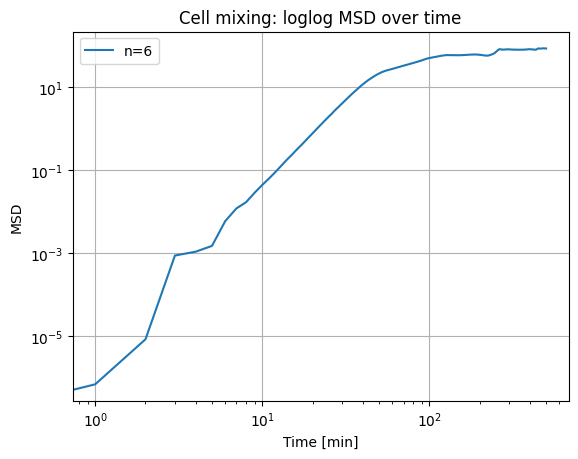

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load motion data from the first file
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000_motion_path.json", 'r') as f1:
    motion_data1 = json.load(f1)

# Load motion data from the second file
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere/20240211_turbulencemotioninsphere_noadhesion_target50s1000seed10_motion_path.json", 'r') as f2:
    motion_data2 = json.load(f2)

# Concatenate motion data dictionaries
motion_data = {**motion_data1, **motion_data2}

print(motion_data.keys())

# Function to calculate mean squared displacement from the initial position
def calculate_msd_from_initial(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    msd_from_initial = [0] * num_time_steps
    initial_positions = {cell: np.array(positions[0]) for cell, positions in data.items()}
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell, positions in data.items():
            current_position = np.array(positions[time_step])
            displacement_from_initial = np.linalg.norm(current_position - initial_positions[cell])**2
            total_squared_displacement += displacement_from_initial
        msd_from_initial[time_step] = total_squared_displacement / num_cells
    return msd_from_initial

# Calculate MSD from the initial position for the combined data
msd_from_initial = calculate_msd_from_initial(motion_data)

# Plotting
time_steps = range(len(msd_from_initial))
plt.loglog(time_steps, msd_from_initial, label="n=6")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: loglog MSD over time")
plt.legend()
plt.grid(True)
plt.show()


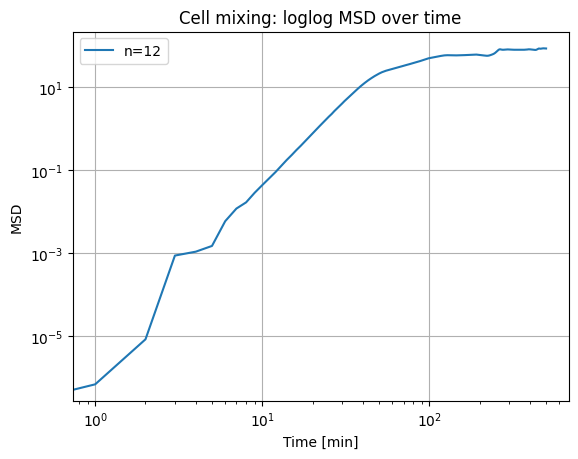

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load motion data from the first file
with open("/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240211_turbulencemotioninsphere_seeds/20240211_turbulencemotioninsphere_seed10_motion_path.json", 'r') as f1:
    motion_data = json.load(f1)

# Function to calculate mean squared displacement from the initial position
def calculate_msd_from_initial(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    msd_from_initial = [0] * num_time_steps
    initial_positions = {cell: np.array(positions[0]) for cell, positions in data.items()}
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell, positions in data.items():
            current_position = np.array(positions[time_step])
            displacement_from_initial = np.linalg.norm(current_position - initial_positions[cell])**2
            total_squared_displacement += displacement_from_initial
        msd_from_initial[time_step] = total_squared_displacement / num_cells
    return msd_from_initial

# Calculate MSD from the initial position for the combined data
msd_from_initial = calculate_msd_from_initial(motion_data)

# Plotting
time_steps = range(len(msd_from_initial))
plt.loglog(time_steps, msd_from_initial, label="n=12")
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Cell mixing: loglog MSD over time")
plt.legend()
plt.grid(True)
plt.show()


Estimated diffusion coefficient: 0.07109233985970519
Actual diffusion coefficient: 0.075


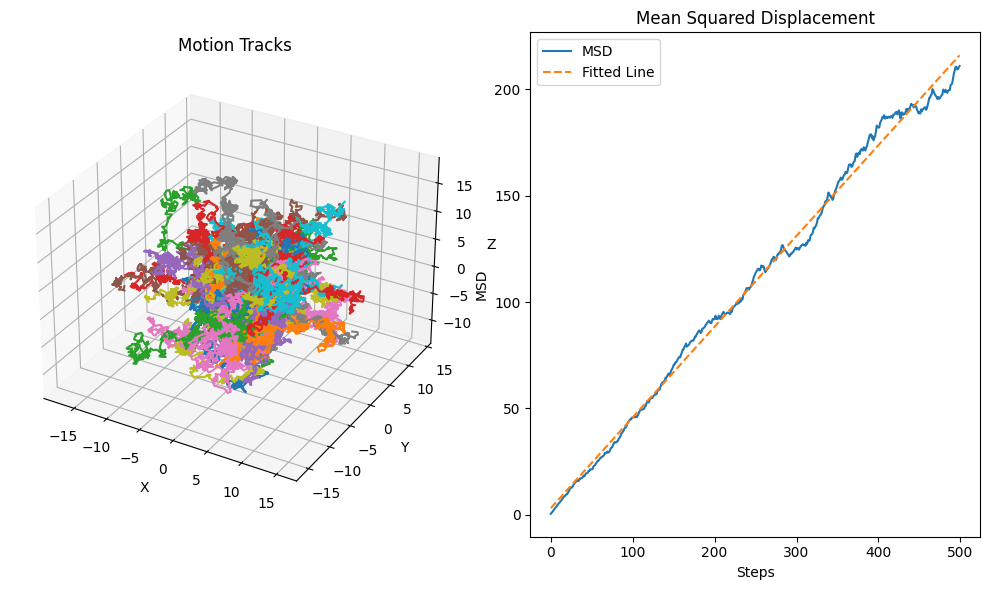

In [299]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_3d(N, steps, diffusion_coefficient):
    # Generate random steps
    steps_x = np.random.normal(0, np.sqrt(diffusion_coefficient), size=(N, steps))
    steps_y = np.random.normal(0, np.sqrt(diffusion_coefficient), size=(N, steps))
    steps_z = np.random.normal(0, np.sqrt(diffusion_coefficient), size=(N, steps))
    
    # Cumulative sum to get the positions
    positions_x = np.cumsum(steps_x, axis=1)
    positions_y = np.cumsum(steps_y, axis=1)
    positions_z = np.cumsum(steps_z, axis=1)
    
    return positions_x, positions_y, positions_z

# Pairwise MSD calculation
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Parameters
N = 100  # Number of particles
steps = 500  # Number of steps
diffusion_coefficient = 0.075

# Simulate random walk
positions_x, positions_y, positions_z = random_walk_3d(N, steps, diffusion_coefficient)

# Calculate Mean Squared Displacement (MSD)
msd = mean_squared_displacement(positions_x, positions_y, positions_z)

# Fit MSD to obtain the diffusion coefficient
fit = np.polyfit(range(steps), msd, 1)
estimated_diffusion_coefficient = fit[0] / 6

print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)
print("Actual diffusion coefficient:", diffusion_coefficient)

# Plot motion tracks
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121, projection='3d')
for i in range(N):
    ax.plot(positions_x[i], positions_y[i], positions_z[i])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Motion Tracks')

# Plot MSD with fitted line
ax2 = fig.add_subplot(122)
ax2.plot(range(steps), msd, label='MSD')
ax2.plot(range(steps), fit[0] * np.array(range(steps)) + fit[1], label='Fitted Line', linestyle='--')
ax2.set_xlabel('Steps')
ax2.set_ylabel('MSD')
ax2.set_title('Mean Squared Displacement')
ax2.legend()

plt.tight_layout()
plt.show()

In [303]:
print(positions_x.shape)
len(positions_x[0])

(100, 500)


500

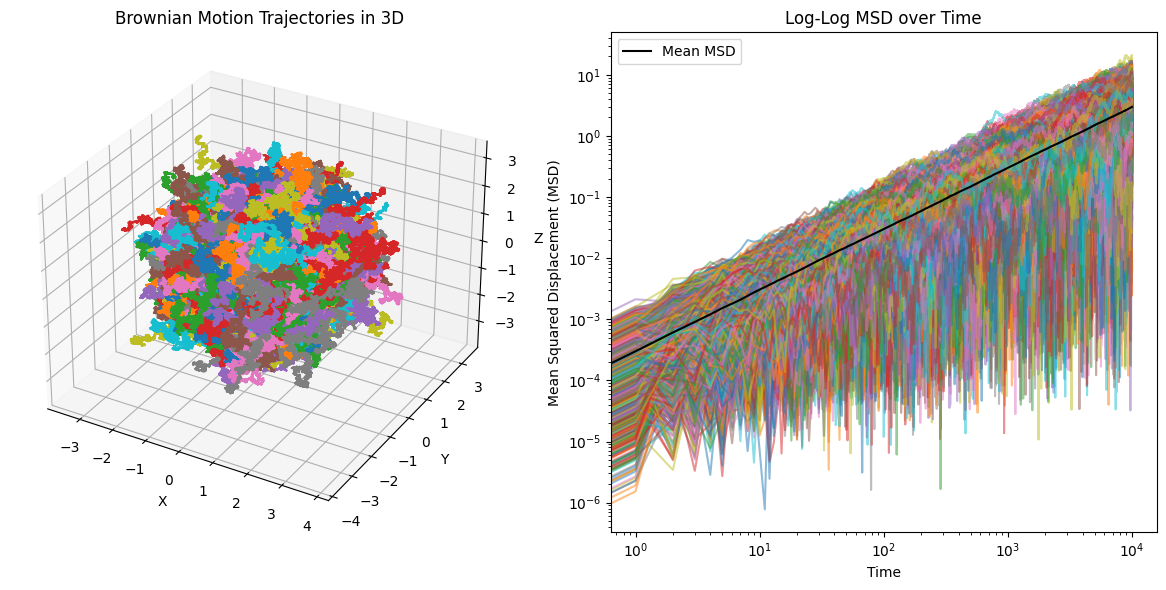

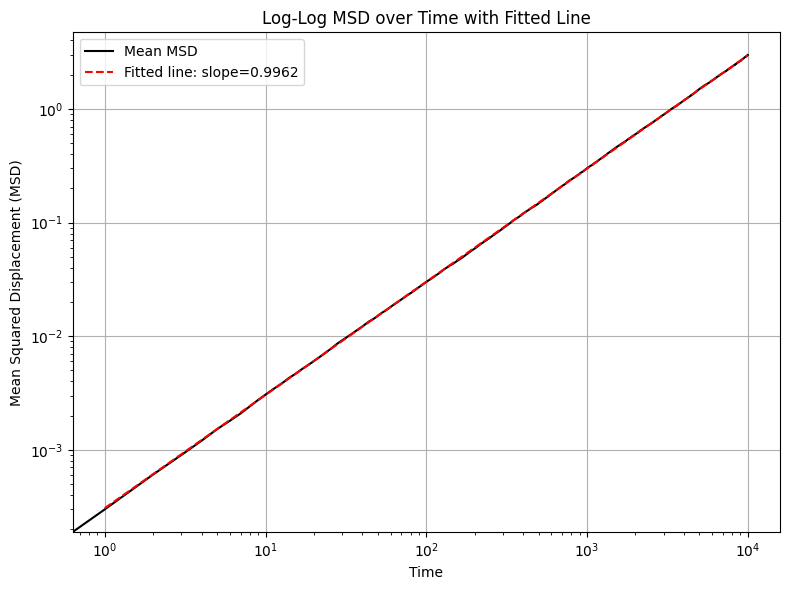

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 0  # Drift coefficient
sigma = .01  # Diffusion coefficient
T = 10000  # Total time
N = 10000  # Number of time steps
dt = T / N  # Time step size
num_particles = 5000  # Number of particles

# Initialize arrays to store positions and time for each particle
t_values = np.linspace(0, T, N + 1)
X_values = np.zeros((num_particles, N + 1))
Y_values = np.zeros((num_particles, N + 1))
Z_values = np.zeros((num_particles, N + 1))

# Generate Wiener process (Brownian motion) for each particle in 3D using Euler-Maruyama method
for p in range(num_particles):
    for i in range(N):
        Z_x = np.random.normal(0, 1)  # Sample from standard normal distribution for x dimension
        Z_y = np.random.normal(0, 1)  # Sample from standard normal distribution for y dimension
        Z_z = np.random.normal(0, 1)  # Sample from standard normal distribution for z dimension
        
        dX = mu * dt + sigma * np.sqrt(dt) * Z_x  # Increment for x dimension
        dY = mu * dt + sigma * np.sqrt(dt) * Z_y  # Increment for y dimension
        dZ = mu * dt + sigma * np.sqrt(dt) * Z_z  # Increment for z dimension

        X_values[p, i + 1] = X_values[p, i] + dX  # Update position in x dimension
        Y_values[p, i + 1] = Y_values[p, i] + dY  # Update position in y dimension
        Z_values[p, i + 1] = Z_values[p, i] + dZ  # Update position in z dimension

# Plot trajectories of the Wiener processes for each particle in 3D
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')

for p in range(num_particles):
    ax1.plot(X_values[p], Y_values[p], Z_values[p], label=f'Particle {p + 1}')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Brownian Motion Trajectories in 3D')

ax2 = fig.add_subplot(122)

# Calculate Mean Squared Displacement (MSD)
MSD = np.zeros(N + 1)
for p in range(num_particles):
    particle_MSD = (X_values[p] - X_values[p, 0])**2 + (Y_values[p] - Y_values[p, 0])**2 + (Z_values[p] - Z_values[p, 0])**2
    MSD += particle_MSD
    # Plot the MSD of the current particle on the log-log plot
    ax2.plot(t_values, particle_MSD, alpha=0.5)  # Set alpha to make lines semi-transparent

MSD /= num_particles

# Plot log-log MSD over time
ax2.loglog(t_values, MSD, label='Mean MSD', color='black')  # Plot mean MSD after plotting individual particle MSDs
ax2.set_xlabel('Time')
ax2.set_ylabel('Mean Squared Displacement (MSD)')
ax2.set_title('Log-Log MSD over Time')
ax2.legend()

plt.tight_layout()
plt.show()

# Plot log-log MSD over time
plt.figure(figsize=(8, 6))
plt.loglog(t_values, MSD, label='Mean MSD', color='black')

# Fit a line (intercept-slope) to the log-log MSD curve
log_t = np.log(t_values[1:])  # Avoid taking log of zero for first value
log_MSD = np.log(MSD[1:])  # Avoid taking log of zero for first value
slope, intercept, _, _, _ = linregress(log_t, log_MSD)

# Plot the fitted line
plt.loglog(t_values[1:], np.exp(intercept) * (t_values[1:]**slope), '--', color='red', label=f'Fitted line: slope={slope:.4f}')

plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('Log-Log MSD over Time with Fitted Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

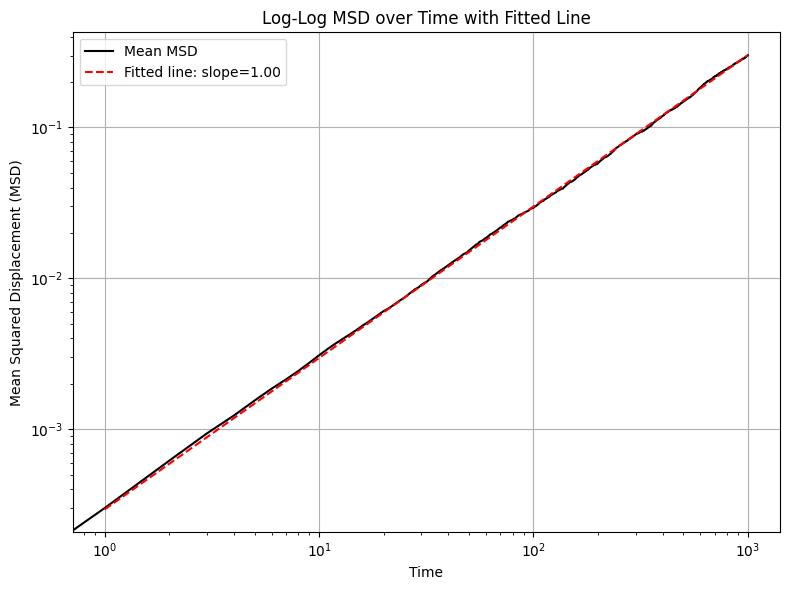

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Parameters
mu = 0  # Drift coefficient
sigma = .01  # Diffusion coefficient
T = 10000  # Total time
N = 10000  # Number of time steps
dt = T / N  # Time step size
num_particles = 5000  # Number of particles

# Initialize arrays to store positions and time for each particle
t_values = np.linspace(0, T, N + 1)
X_values = np.zeros((num_particles, N + 1))
Y_values = np.zeros((num_particles, N + 1))
Z_values = np.zeros((num_particles, N + 1))

# Generate Wiener process (Brownian motion) for each particle in 3D using Euler-Maruyama method
for p in range(num_particles):
    for i in range(N):
        Z_x = np.random.normal(0, 1)  # Sample from standard normal distribution for x dimension
        Z_y = np.random.normal(0, 1)  # Sample from standard normal distribution for y dimension
        Z_z = np.random.normal(0, 1)  # Sample from standard normal distribution for z dimension
        
        dX = mu * dt + sigma * np.sqrt(dt) * Z_x  # Increment for x dimension
        dY = mu * dt + sigma * np.sqrt(dt) * Z_y  # Increment for y dimension
        dZ = mu * dt + sigma * np.sqrt(dt) * Z_z  # Increment for z dimension

        X_values[p, i + 1] = X_values[p, i] + dX  # Update position in x dimension
        Y_values[p, i + 1] = Y_values[p, i] + dY  # Update position in y dimension
        Z_values[p, i + 1] = Z_values[p, i] + dZ  # Update position in z dimension

# Calculate Mean Squared Displacement (MSD)
MSD = np.zeros(N + 1)
for p in range(num_particles):
    particle_MSD = (X_values[p] - X_values[p, 0])**2 + (Y_values[p] - Y_values[p, 0])**2 + (Z_values[p] - Z_values[p, 0])**2
    MSD += particle_MSD

MSD /= num_particles

# Plot log-log MSD over time
plt.figure(figsize=(8, 6))
plt.loglog(t_values, MSD, label='Mean MSD', color='black')

# Fit a line (intercept-slope) to the log-log MSD curve
log_t = np.log(t_values[1:])  # Avoid taking log of zero for first value
log_MSD = np.log(MSD[1:])  # Avoid taking log of zero for first value
slope, intercept, _, _, _ = linregress(log_t, log_MSD)

# Plot the fitted line
plt.loglog(t_values[1:], np.exp(intercept) * (t_values[1:]**slope), '--', color='red', label=f'Fitted line: slope={slope:.4f}')

plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('Log-Log MSD over Time with Fitted Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


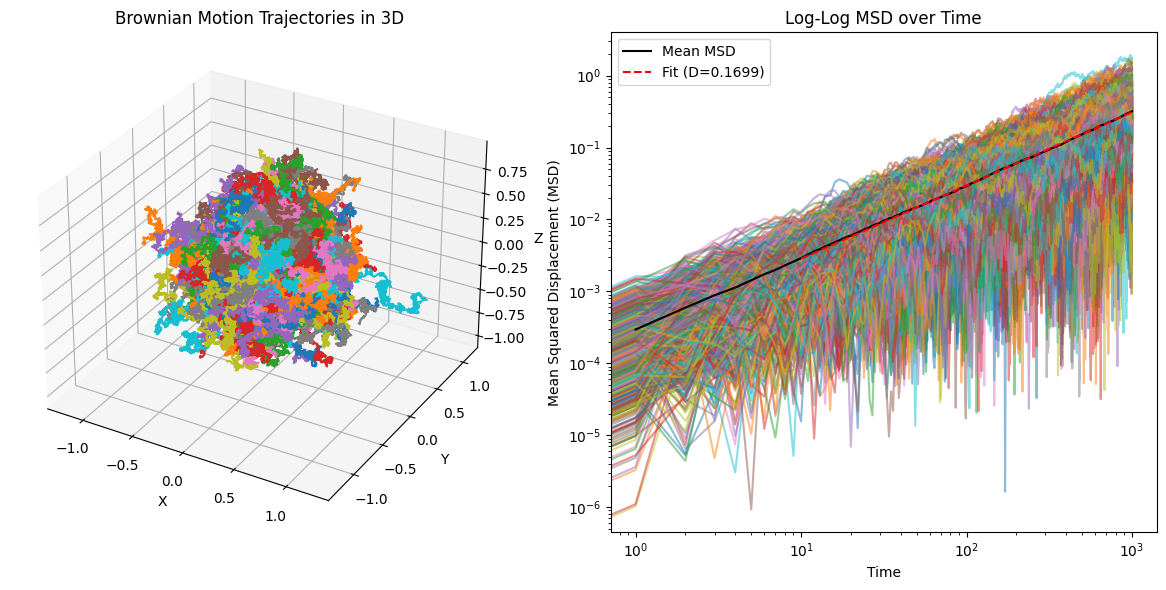

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Parameters
mu = 0  # Drift coefficient
sigma = 0.1  # Diffusion coefficient
T = 1000  # Total time
N = 1000  # Number of time steps
dt = T / N  # Time step size
num_particles = 1000  # Number of particles

# Initialize arrays to store positions and time for each particle
t_values = np.linspace(0, T, N + 1)
X_values = np.zeros((num_particles, N + 1))
Y_values = np.zeros((num_particles, N + 1))
Z_values = np.zeros((num_particles, N + 1))

# Generate Wiener process (Brownian motion) for each particle in 3D using Euler-Maruyama method
for p in range(num_particles):
    for i in range(N):
        Z_x = np.random.normal(0, sigma)  # Sample from standard normal distribution for x dimension
        Z_y = np.random.normal(0, sigma)  # Sample from standard normal distribution for y dimension
        Z_z = np.random.normal(0, sigma)  # Sample from standard normal distribution for z dimension
        
        dX = mu * dt + sigma * dt * Z_x  # Increment for x dimension
        dY = mu * dt + sigma * dt * Z_y  # Increment for y dimension
        dZ = mu * dt + sigma * dt * Z_z  # Increment for z dimension

        X_values[p, i + 1] = X_values[p, i] + dX  # Update position in x dimension
        Y_values[p, i + 1] = Y_values[p, i] + dY  # Update position in y dimension
        Z_values[p, i + 1] = Z_values[p, i] + dZ  # Update position in z dimension

# Calculate Mean Squared Displacement (MSD)
MSD = np.zeros(N + 1)
for p in range(num_particles):
    particle_MSD = (X_values[p] - X_values[p, 0])**2 + (Y_values[p] - Y_values[p, 0])**2 + (Z_values[p] - Z_values[p, 0])**2
    MSD += particle_MSD

MSD /= num_particles

# Perform linear regression on the log-log plot
x = np.log(t_values[10:])  # Exclude the first element
y = np.log(MSD[10:])  # Exclude the first element
slope, intercept, _, _, _ = linregress(x, y)
diffusion_coefficient = slope / (6 * dt)   # Convert back to original scale and divide by 2

# Plot trajectories of the Wiener processes for each particle in 3D
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')

for p in range(num_particles):
    ax1.plot(X_values[p], Y_values[p], Z_values[p], label=f'Particle {p + 1}')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Brownian Motion Trajectories in 3D')

ax2 = fig.add_subplot(122)
# Plot log-log MSD over time
# Calculate Mean Squared Displacement (MSD)
MSD = np.zeros(N + 1)
for p in range(num_particles):
    particle_MSD = (X_values[p] - X_values[p, 0])**2 + (Y_values[p] - Y_values[p, 0])**2 + (Z_values[p] - Z_values[p, 0])**2
    MSD += particle_MSD
    # Plot the MSD of the current particle on the log-log plot
    ax2.loglog(t_values, particle_MSD, alpha=0.5)  # Set alpha to make lines semi-transparent

MSD /= num_particles
ax2.plot(t_values[1:], MSD[1:], label='Mean MSD', color='black')  # Plot mean MSD
ax2.plot(t_values[10:], np.exp(intercept + slope * x), 'r--', label=f'Fit (D={diffusion_coefficient:.4f})')  # Plot fitted line
ax2.set_xlabel('Time')
ax2.set_ylabel('Mean Squared Displacement (MSD)')
ax2.set_title('Log-Log MSD over Time')
ax2.legend()

plt.tight_layout()
plt.show()

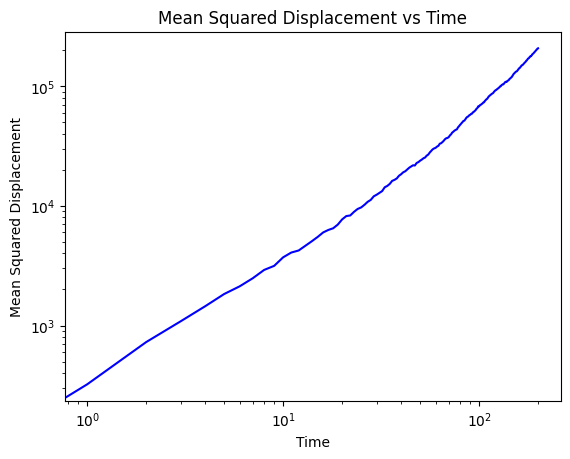

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
mu = 1  # Drift coefficient
sigma = 10  # Diffusion coefficient
T = 200  # Total time
N = 200  # Number of time steps
dt = T / N  # Time step size
num_particles = 100  # Number of particles

# Initialize arrays to store positions and time for each particle
t_values = np.linspace(0, T, N+1)
X_values = np.zeros((num_particles, N+1, 3))

# Generate Wiener process (Brownian motion) for each particle using Euler-Maruyama method
for p in range(num_particles):
    for i in range(N):
        Z = np.random.normal(0, 1, size=3)  # Sample from standard normal distribution
        dX = mu * dt + sigma * np.sqrt(dt) * Z  # Increment
        X_values[p, i+1] = X_values[p, i] + dX  # Update position

# Compute squared displacements for each particle
squared_displacements = np.sum((X_values - X_values[:, 0:1])**2, axis=2)

# Compute average squared displacement over particles
avg_squared_displacement = np.mean(squared_displacements, axis=0)

# Plot MSD
plt.loglog(t_values, avg_squared_displacement, label='Mean Squared Displacement', color='blue')
plt.xlabel('Time')
plt.ylabel('Mean Squared Displacement')
plt.title('Mean Squared Displacement vs Time')
plt.show()


/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/20240402_motion_7_motion_path.json
/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/20240402_motion_3_motion_path.json
/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/20240402_motion_8_motion_path.json
/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/20240402_motion_6_motion_path.json
/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/20240402_motion_2_motion_path.json
/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/20240402_motion_9_motion_path.json
/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/20240402_motion_5_motion_path.json
/Users/antoine/Harvard/Mega

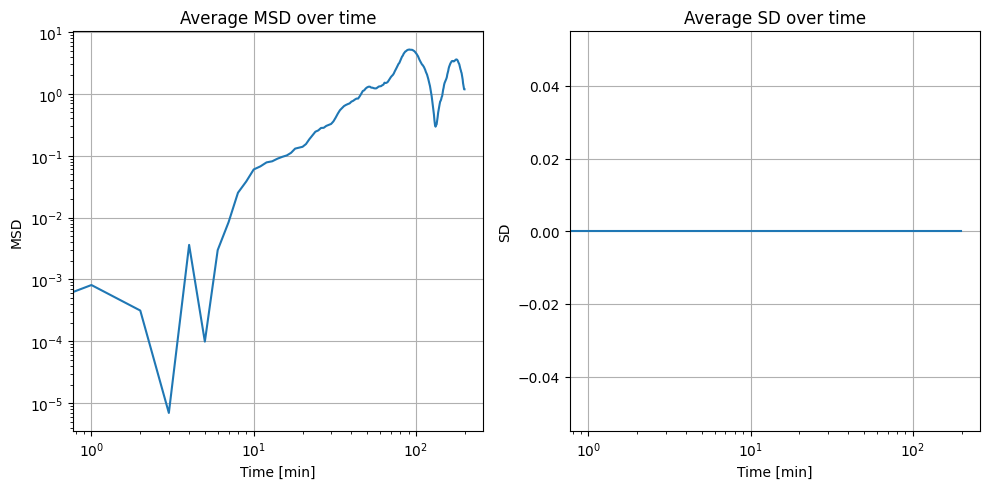

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

# Define the folder path containing motion data files
folder_path = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/"

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate mean squared displacement from the initial position
def calculate_msd_from_initial(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    msd_from_initial = [0] * num_time_steps
    initial_positions = {cell: np.array(positions[0]) for cell, positions in data.items()}
    for time_step in range(num_time_steps):
        total_squared_displacement = 0
        for cell, positions in data.items():
            current_position = np.array(positions[time_step])
            displacement_from_initial = np.linalg.norm(current_position - initial_positions[cell])**2
            total_squared_displacement += displacement_from_initial
        msd_from_initial[time_step] = total_squared_displacement / num_cells
    return msd_from_initial

# Function to calculate standard deviation over time for each iteration
def calculate_sd_over_time(data):
    num_time_steps = len(next(iter(data.values())))
    num_cells = len(data)
    sd_over_time = [0] * num_time_steps
    positions_array = np.array(list(data.values()))
    for time_step in range(num_time_steps):
        sd_over_time[time_step] = np.std(positions_array[:, time_step, :], axis=0).mean()
    return sd_over_time

# Initialize an empty list to store motion data from all files
all_motion_data = []

# Loop over files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith("_motion_path.json"):
        file_path = os.path.join(folder_path, filename)
        print(file_path)
        # Load motion data from the file
        motion_data = load_motion_data(file_path)
        # Append motion data to the list
        all_motion_data.append(motion_data)

# Convert the list of dictionaries into a single dictionary
combined_motion_data = {}
for data in all_motion_data:
    combined_motion_data.update(data)

# Calculate MSD from the initial position for the combined data
msd_from_initial = calculate_msd_from_initial(combined_motion_data)

# Calculate SD over time for each iteration
sd_over_time = calculate_sd_over_time(combined_motion_data)

# Plotting
time_steps = range(len(msd_from_initial))
plt.figure(figsize=(10, 5))

# Plot MSD
plt.subplot(1, 2, 1)
plt.loglog(time_steps, msd_from_initial)
plt.xlabel("Time [min]")
plt.ylabel("MSD")
plt.title("Average MSD over time")
plt.grid(True)

# Plot SD over time
plt.subplot(1, 2, 2)
plt.semilogx(time_steps, sd_over_time)
plt.xlabel("Time [min]")
plt.ylabel("SD")
plt.title("Average SD over time")
plt.grid(True)

plt.tight_layout()
plt.show()


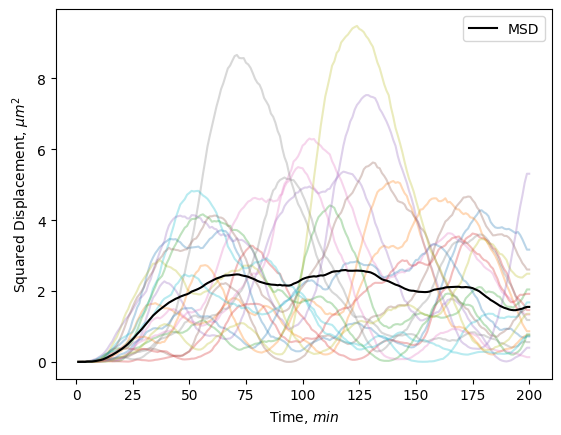

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob

def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_1/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')

plt.xlabel(r'Time, $min$')
plt.ylabel(r'Squared Displacement, $\mu m^2$')
plt.legend()
plt.show()


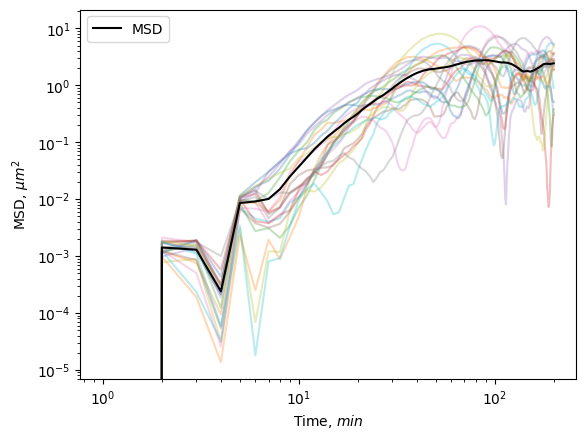

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob

def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_gaussian/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all file
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.loglog(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')

plt.xlabel(r'Time, $min$')
plt.ylabel(r'MSD, $\mu m^2$')
plt.legend()
plt.show()


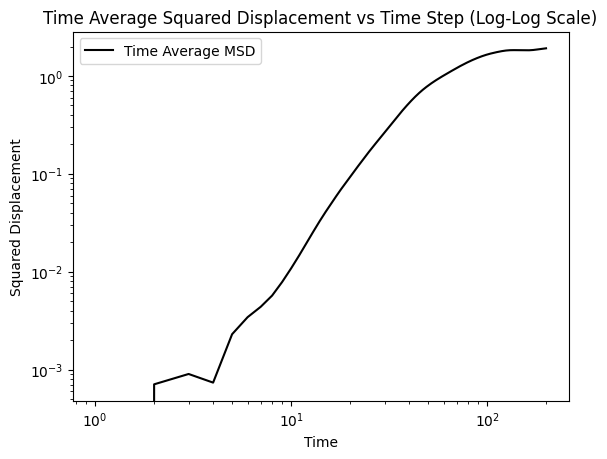

In [67]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob

def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate time average squared displacement
def time_average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    time_avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        time_avg_squared_displacements += np.cumsum(squared_displacements) / (np.arange(num_steps) + 1)
    
    time_avg_squared_displacements /= num_particles
    return time_avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240402_motion_gaussian/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate time average squared displacement
time_avg_squared_displacements = time_average_squared_displacement(all_paths)

# Plot time average squared displacement
plt.loglog(range(1, len(time_avg_squared_displacements) + 1), time_avg_squared_displacements, label="Time Average MSD", color='black')

plt.xlabel('Time')
plt.ylabel('Squared Displacement')
plt.title('Time Average Squared Displacement vs Time Step (Log-Log Scale)')
plt.legend()
plt.show()


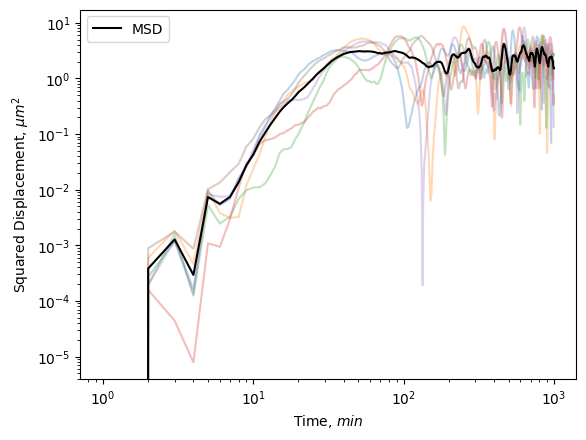

In [14]:
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240408_motion_t1000/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.loglog(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')

plt.xlabel(r'Time, $min$')
plt.ylabel(r'Squared Displacement, $\mu m^2$')
plt.legend()
plt.show()


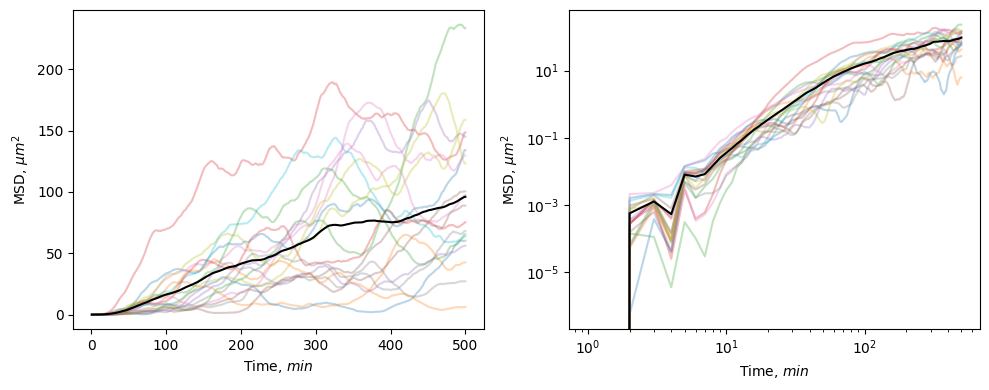

In [74]:
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_diffusive/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Plot MSD
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
plt.xlabel(r'Time, $min$')
plt.ylabel(r'MSD, $\mu m^2$')

plt.subplot(1, 2, 2)
# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.loglog(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.loglog(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
plt.xlabel(r'Time, $min$')
plt.ylabel(r'MSD, $\mu m^2$')
plt.tight_layout()
plt.show()

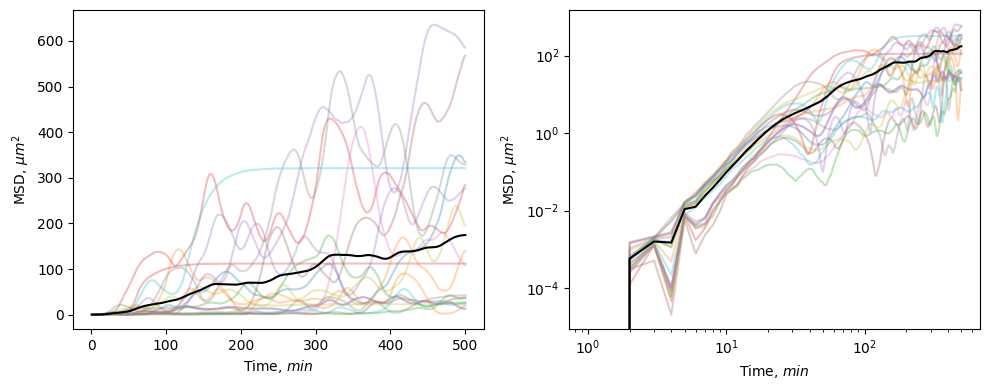

In [83]:
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_diffusive_force/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Plot MSD
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
plt.xlabel(r'Time, $min$')
plt.ylabel(r'MSD, $\mu m^2$')

plt.subplot(1, 2, 2)
# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.loglog(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.loglog(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
plt.xlabel(r'Time, $min$')
plt.ylabel(r'MSD, $\mu m^2$')
plt.tight_layout()
plt.show()

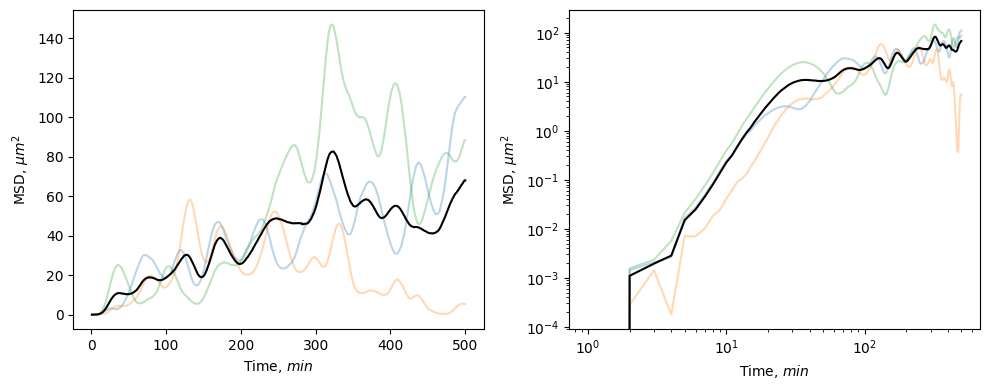

In [94]:
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_diffusive_force_center/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Plot MSD
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
plt.xlabel(r'Time, $min$')
plt.ylabel(r'MSD, $\mu m^2$')

plt.subplot(1, 2, 2)
# Plot individual squared displacements
for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
    plt.loglog(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.3)

# Plot average squared displacement over all files
plt.loglog(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
plt.xlabel(r'Time, $min$')
plt.ylabel(r'MSD, $\mu m^2$')
plt.tight_layout()
plt.show()

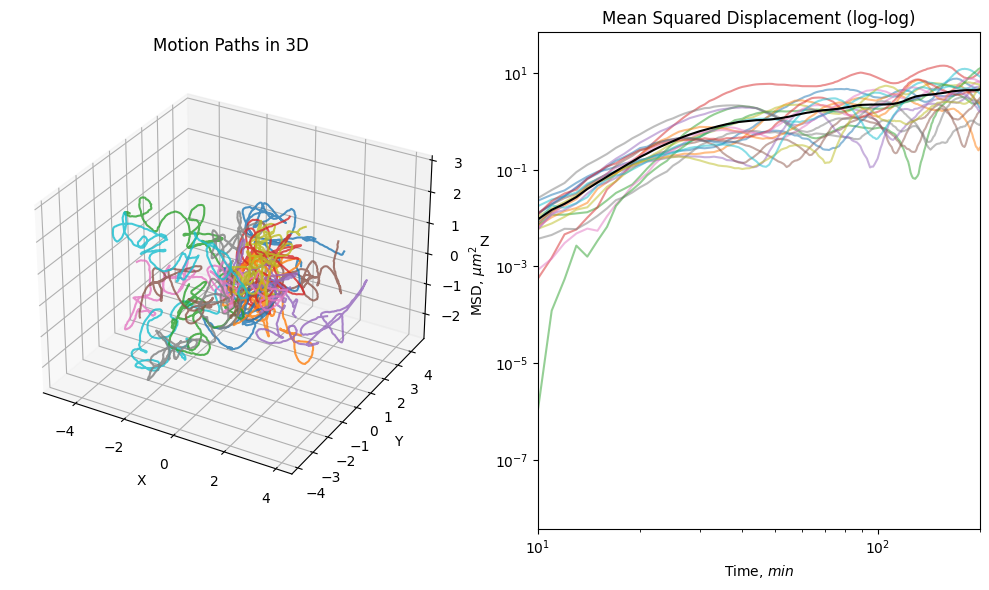

In [112]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_diffusive_force_center/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        x = [coord[0] for coord in path]
        y = [coord[1] for coord in path]
        z = [coord[2] for coord in path]
        ax1.plot(x, y, z, alpha=0.8)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)
    # Plot individual squared displacements
    for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
        ax2.loglog(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.loglog(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement (log-log)')
    ax2.set_xlim([10, 200])
    
    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

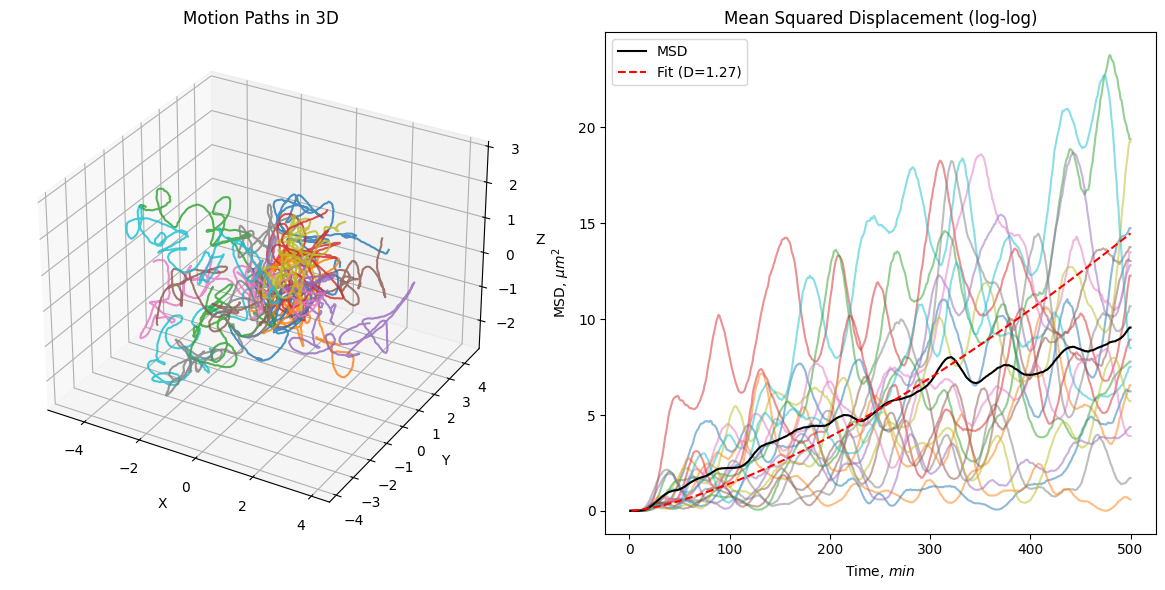

In [131]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_diffusive_force_center/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        x = [coord[0] for coord in path]
        y = [coord[1] for coord in path]
        z = [coord[2] for coord in path]
        ax1.plot(x, y, z, alpha=0.8)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)
    # Plot individual squared displacements
    for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement (log-log)')
    #ax2.set_xlim([10, 200])

    # Fit a straight line to the log-log MSD (disregarding the first 10 data points)
    x = np.log(range(2, len(avg_squared_displacements_overall) + 1))
    y = np.log(avg_squared_displacements_overall[1:])
    slope, intercept, _, _, _ = linregress(x, y)
    diffusion_coefficient = np.exp(slope / 6)
    ax2.plot(np.exp(x), np.exp(intercept + slope * x), 'r--', label=f'Fit (D={diffusion_coefficient:.2f})')
    ax2.legend()

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()


Estimated diffusion coefficient: 0.04140632106743979


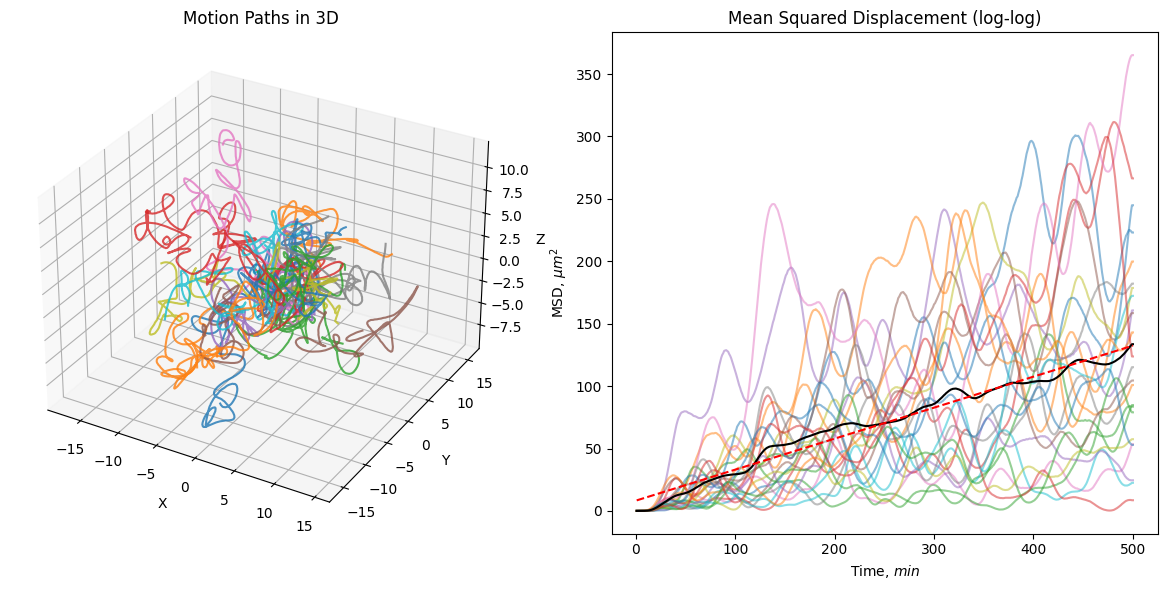

In [279]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to calculate average squared displacement
def average_squared_displacement(paths):
    num_steps = len(paths[0])
    num_particles = len(paths)
    avg_squared_displacements = np.zeros(num_steps)
    
    for path in paths:
        initial_coord = path[0]
        squared_displacements = squared_displacement(initial_coord, path)
        avg_squared_displacements += np.array(squared_displacements)
    
    avg_squared_displacements /= num_particles
    return avg_squared_displacements

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_random_walk/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
avg_squared_displacements_all = []
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)
    avg_squared_displacements = average_squared_displacement(paths)
    avg_squared_displacements_all.append(avg_squared_displacements)

# Calculate average squared displacement over all files
avg_squared_displacements_overall = average_squared_displacement(all_paths)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        x = [coord[0] for coord in path]
        y = [coord[1] for coord in path]
        z = [coord[2] for coord in path]
        ax1.plot(x, y, z, alpha=0.8)
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)
    # Plot individual squared displacements
    for idx, avg_squared_displacements in enumerate(avg_squared_displacements_all):
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement (log-log)')
    #ax2.set_xlim([10, 200])

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve
    estimated_diffusion_coefficient = fit[0] / 6  # Divide slope by 6 for 3D diffusion

    # Plot the fit
    ax2.plot(time_values, fit[0] * time_values + fit[1], '--', label='Fit', color='red')

    print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

Estimated diffusion coefficient: 0.07951358794880314


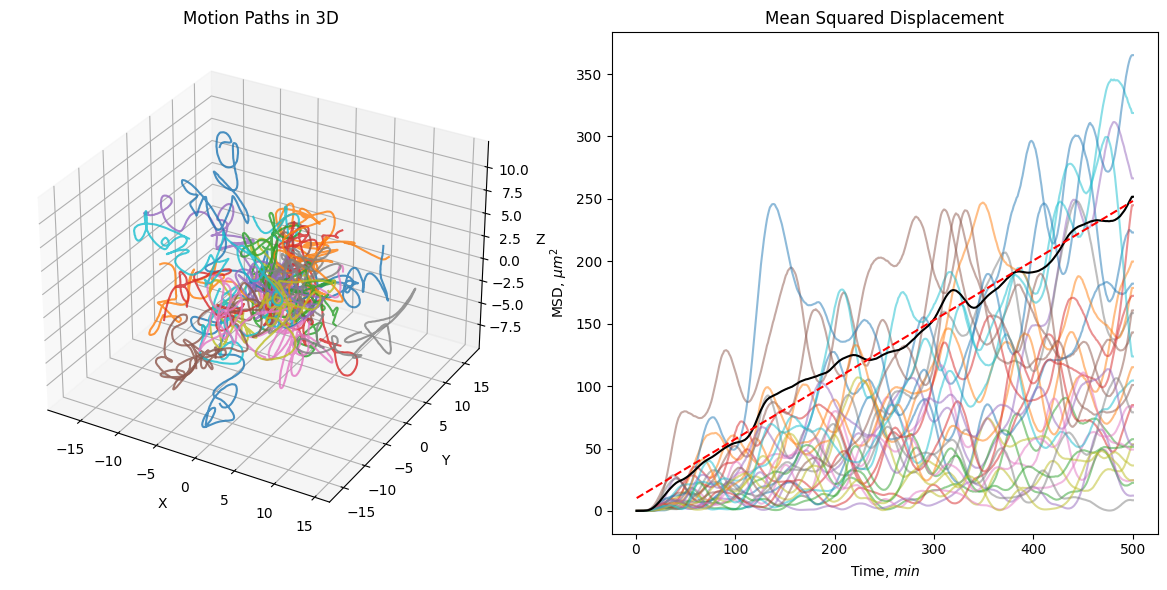

In [290]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_random_walk/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate average squared displacement over all files
all_positions_x = [np.array(path)[:, 0] for path in all_paths]
all_positions_y = [np.array(path)[:, 1] for path in all_paths]
all_positions_z = [np.array(path)[:, 2] for path in all_paths]

avg_squared_displacements_overall = mean_squared_displacement(all_positions_x, all_positions_y, all_positions_z)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        path_array = np.array(path)
        ax1.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], alpha=0.8)
        
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot individual squared displacements
    for idx, path in enumerate(paths):
        avg_squared_displacements = squared_displacement(path[0], path)
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement')

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve
    estimated_diffusion_coefficient = fit[0] / 6  # Divide slope by 6 for 3D diffusion

    # Plot the fit
    ax2.plot(time_values, fit[0] * time_values + fit[1], '--', label='Fit', color='red')

    print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

Estimated diffusion coefficient: 0.078885922520447


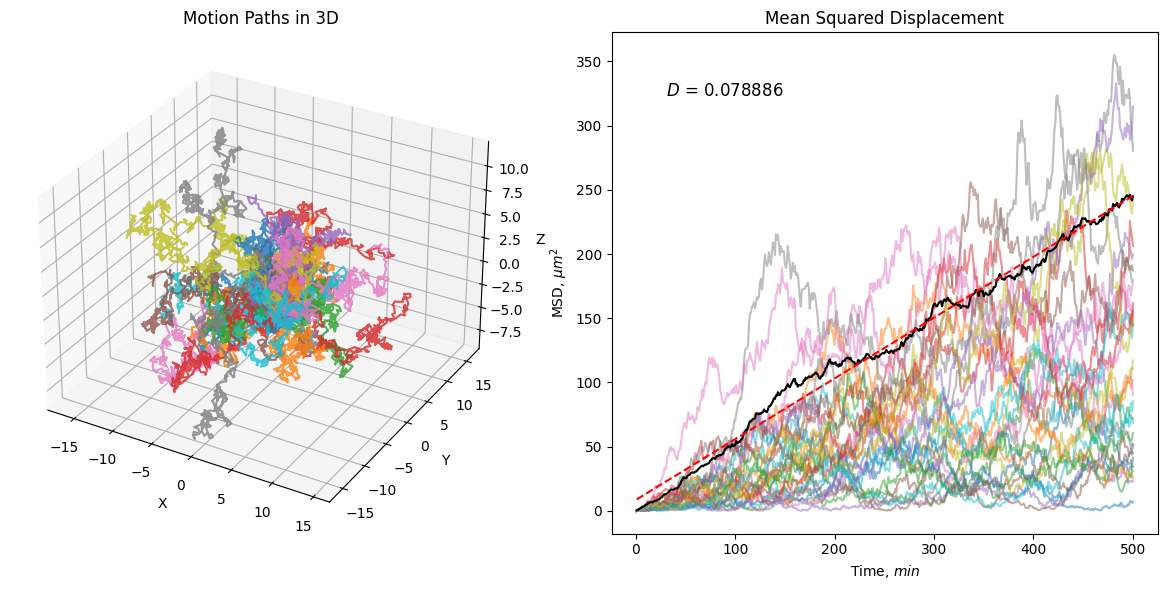

In [324]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_random_walk/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*motion_force_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate average squared displacement over all files
all_positions_x = [np.array(path)[:, 0] for path in all_paths]
all_positions_y = [np.array(path)[:, 1] for path in all_paths]
all_positions_z = [np.array(path)[:, 2] for path in all_paths]

avg_squared_displacements_overall = mean_squared_displacement(all_positions_x, all_positions_y, all_positions_z)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        path_array = np.array(path)
        ax1.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], alpha=0.8)
        
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot individual squared displacements
    for idx, path in enumerate(paths):
        avg_squared_displacements = squared_displacement(path[0], path)
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement')

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve
    estimated_diffusion_coefficient = fit[0] / 6  # Divide slope by 6 for 3D diffusion

    # Plot the fit
    ax2.plot(time_values, fit[0] * time_values + fit[1], '--', label='Fit', color='red')
    ax2.text(0.1, 0.9, fr'$D$ = {estimated_diffusion_coefficient:.6f}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')

    print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

Estimated diffusion coefficient (linear scale): 0.078885922520447


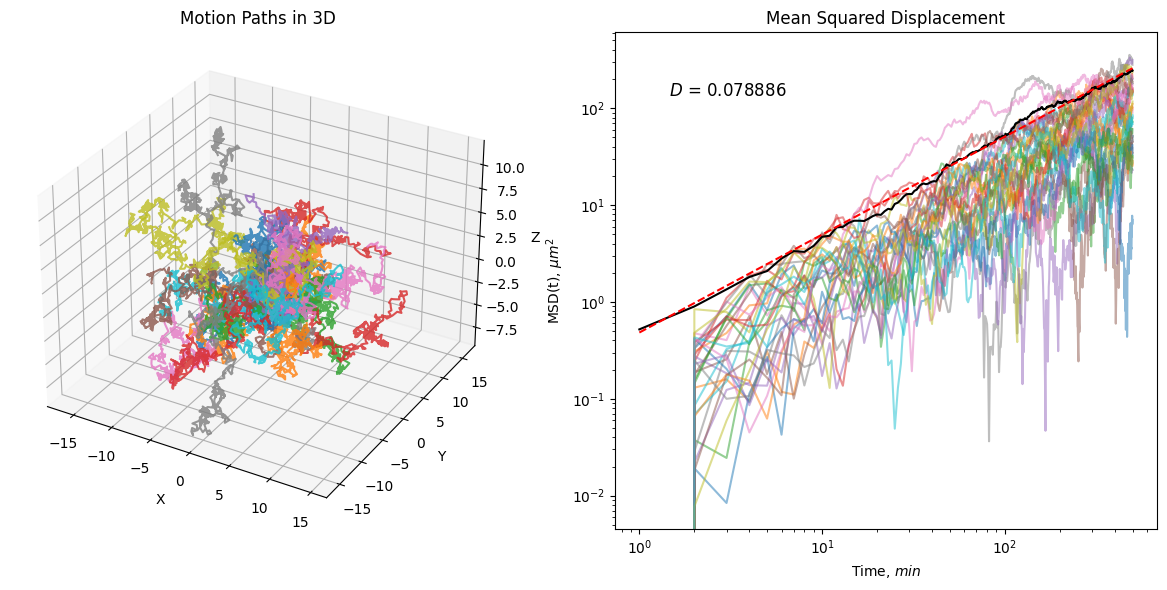

In [323]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240409_motion_random_walk/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*motion_force_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate average squared displacement over all files
all_positions_x = [np.array(path)[:, 0] for path in all_paths]
all_positions_y = [np.array(path)[:, 1] for path in all_paths]
all_positions_z = [np.array(path)[:, 2] for path in all_paths]

avg_squared_displacements_overall = mean_squared_displacement(all_positions_x, all_positions_y, all_positions_z)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        path_array = np.array(path)
        ax1.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], alpha=0.8)
        
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot individual squared displacements
    for idx, path in enumerate(paths):
        avg_squared_displacements = squared_displacement(path[0], path)
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.loglog(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD(t), $\mu m^2$')
    ax2.set_title('Mean Squared Displacement')

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve on log-log scale
    estimated_diffusion_coefficient_linear = fit[0] / 6  # Divide slope by 6 for 3D diffusion


    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(np.log(time_values), np.log(avg_squared_displacements_overall), 1)  # Fit a linear curve on log-log scale

    # Plot the fit
    ax2.loglog(time_values, np.exp(fit[0] * np.log(time_values) + fit[1]), '--', label='Fit', color='red')
    # Add text with estimated diffusion coefficient
    ax2.text(0.1, 0.9, fr'$D$ = {estimated_diffusion_coefficient_linear:.6f}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')

    print("Estimated diffusion coefficient (linear scale):", estimated_diffusion_coefficient_linear)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

Estimated diffusion coefficient: 0.10746794997559796


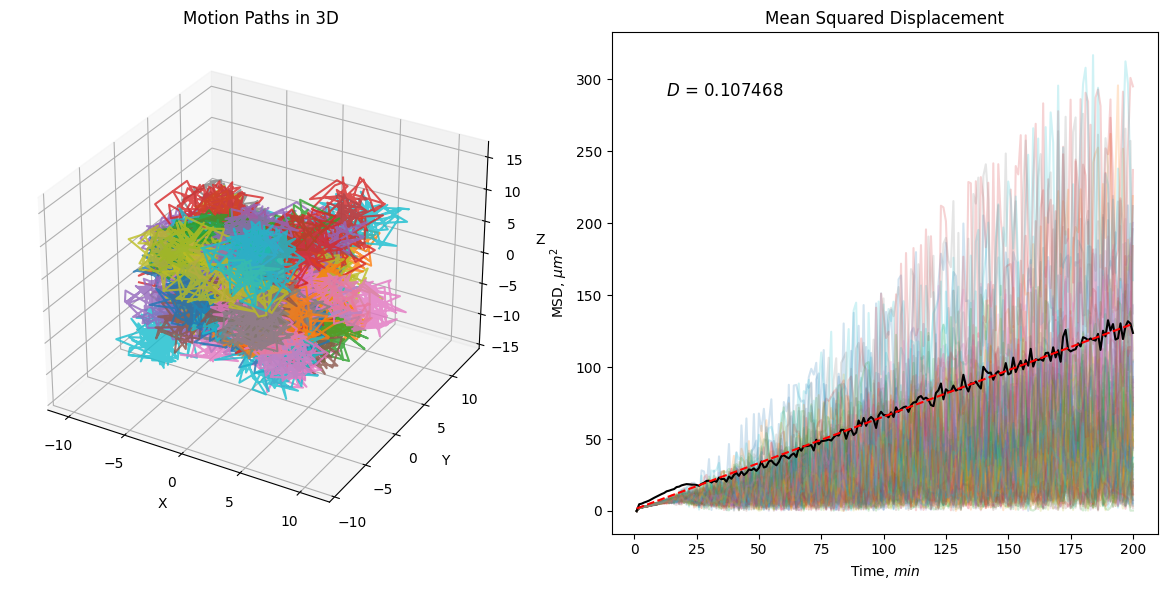

In [54]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240415_motion_random_sphere/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*motion_force_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate average squared displacement over all files
all_positions_x = [np.array(path)[:, 0] for path in all_paths]
all_positions_y = [np.array(path)[:, 1] for path in all_paths]
all_positions_z = [np.array(path)[:, 2] for path in all_paths]

avg_squared_displacements_overall = mean_squared_displacement(all_positions_x, all_positions_y, all_positions_z)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        path_array = np.array(path)
        ax1.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], alpha=0.8)
        
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot individual squared displacements
    for idx, path in enumerate(paths):
        avg_squared_displacements = squared_displacement(path[0], path)
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.2)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement')

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve
    estimated_diffusion_coefficient = fit[0] / 6  # Divide slope by 6 for 3D diffusion

    # Plot the fit
    ax2.plot(time_values, fit[0] * time_values + fit[1], '--', label='Fit', color='red')
    ax2.text(0.1, 0.9, fr'$D$ = {estimated_diffusion_coefficient:.6f}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')

    print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

Estimated diffusion coefficient: 0.1056777977187799


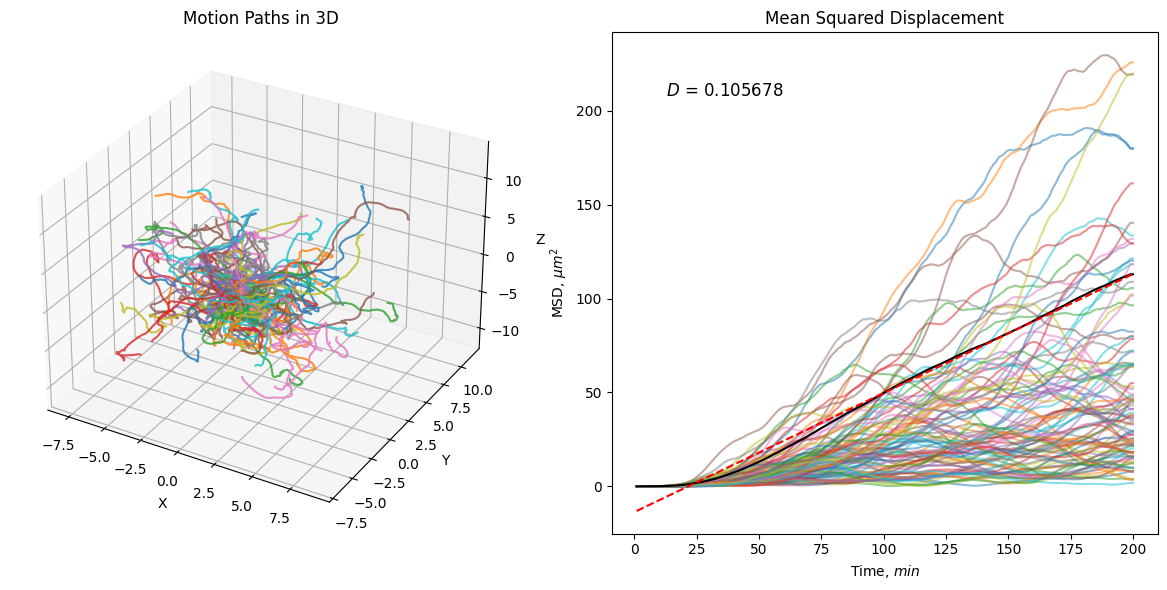

In [55]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240415_motion_random_sphere/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*motion_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate average squared displacement over all files
all_positions_x = [np.array(path)[:, 0] for path in all_paths]
all_positions_y = [np.array(path)[:, 1] for path in all_paths]
all_positions_z = [np.array(path)[:, 2] for path in all_paths]

avg_squared_displacements_overall = mean_squared_displacement(all_positions_x, all_positions_y, all_positions_z)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        path_array = np.array(path)
        ax1.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], alpha=0.8)
        
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot individual squared displacements
    for idx, path in enumerate(paths):
        avg_squared_displacements = squared_displacement(path[0], path)
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement')

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve
    estimated_diffusion_coefficient = fit[0] / 6  # Divide slope by 6 for 3D diffusion

    # Plot the fit
    ax2.plot(time_values, fit[0] * time_values + fit[1], '--', label='Fit', color='red')
    ax2.text(0.1, 0.9, fr'$D$ = {estimated_diffusion_coefficient:.6f}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')

    print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

Estimated diffusion coefficient: 0.088610105208304


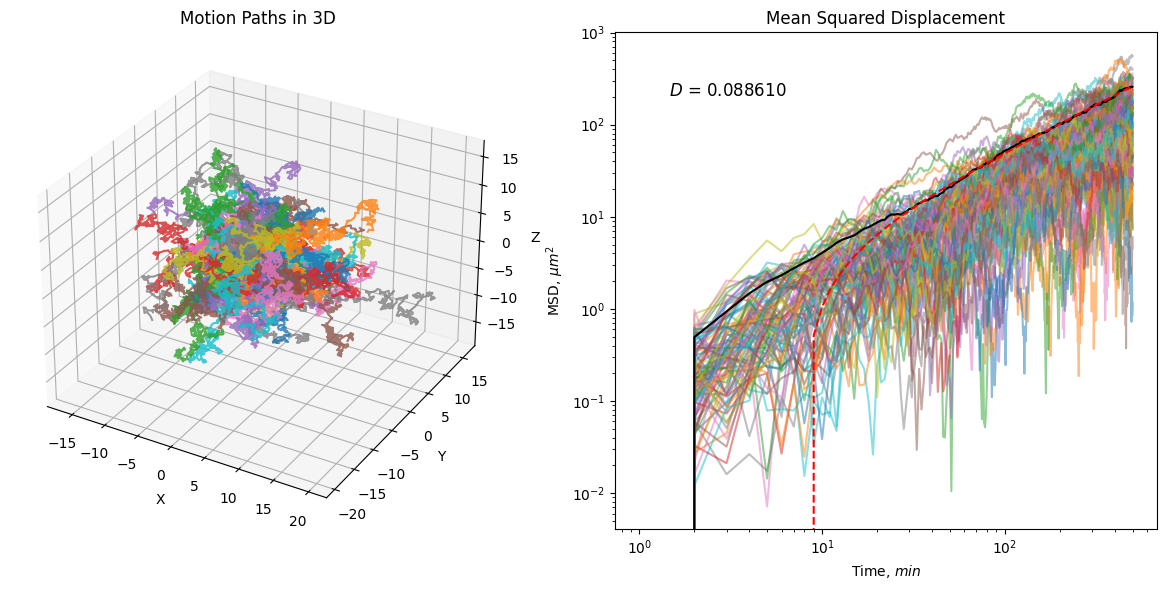

In [51]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240415_motion_random_walk/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*motion_force_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate average squared displacement over all files
all_positions_x = [np.array(path)[:, 0] for path in all_paths]
all_positions_y = [np.array(path)[:, 1] for path in all_paths]
all_positions_z = [np.array(path)[:, 2] for path in all_paths]

avg_squared_displacements_overall = mean_squared_displacement(all_positions_x, all_positions_y, all_positions_z)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        path_array = np.array(path)
        ax1.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], alpha=0.8)
        
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot individual squared displacements
    for idx, path in enumerate(paths):
        avg_squared_displacements = squared_displacement(path[0], path)
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement')

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve
    estimated_diffusion_coefficient = fit[0] / 6  # Divide slope by 6 for 3D diffusion

    # Plot the fit
    ax2.plot(time_values, fit[0] * time_values + fit[1], '--', label='Fit', color='red')
    ax2.text(0.1, 0.9, fr'$D$ = {estimated_diffusion_coefficient:.6f}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')

    print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()

Estimated diffusion coefficient: 0.08906352553361126


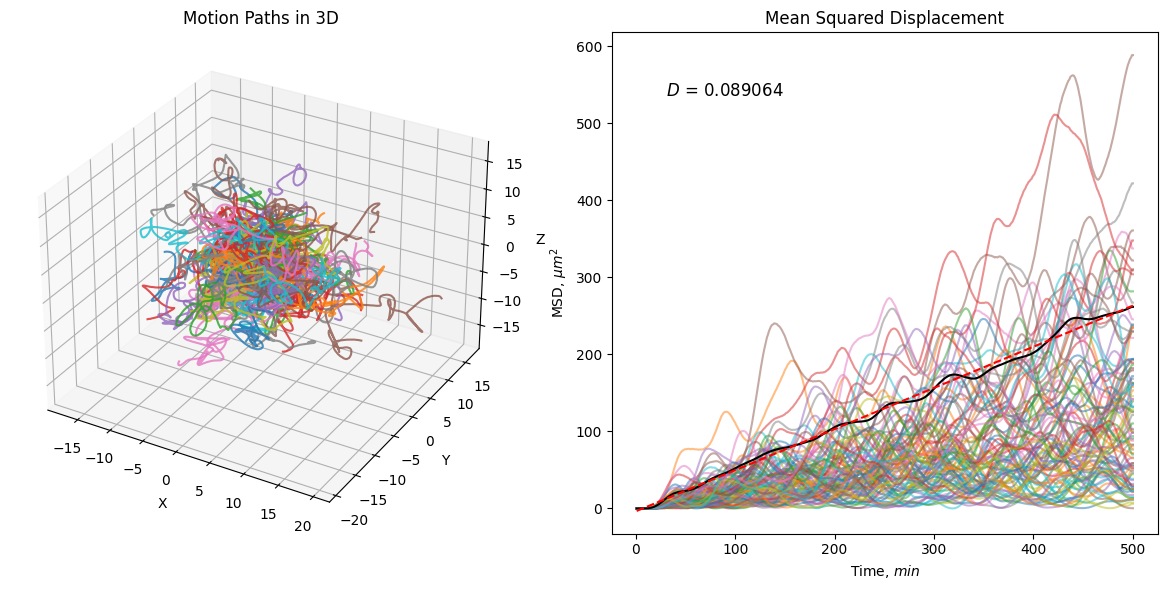

In [53]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to calculate squared displacement
def squared_displacement(initial_coord, path):
    squared_displacements = []
    for coord in path:
        squared_displacement = sum((coord[i] - initial_coord[i]) ** 2 for i in range(3))
        squared_displacements.append(squared_displacement)
    return squared_displacements

# Function to load motion data from a file
def load_motion_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
def mean_squared_displacement(positions_x, positions_y, positions_z):
    N = len(positions_x)
    steps = len(positions_x[0])
    msd = np.zeros(steps)
    
    for i in range(N):
        for j in range(i+1, N):
            dx = positions_x[i] - positions_x[j]
            dy = positions_y[i] - positions_y[j]
            dz = positions_z[i] - positions_z[j]
            squared_displacement = dx**2 + dy**2 + dz**2
            msd += squared_displacement
    
    msd /= N * (N - 1) / 2
    
    return msd

# Directory containing motion data files
directory = "/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240415_motion_random_walk/"

# Find all files in the directory that correspond to _motion_path
motion_files = glob.glob(directory + "*_motion_path.json")

# Load and process motion data from all files
all_paths = []
for motion_file in motion_files:
    data = load_motion_data(motion_file)
    paths = list(data.values())
    all_paths.extend(paths)

# Calculate average squared displacement over all files
all_positions_x = [np.array(path)[:, 0] for path in all_paths]
all_positions_y = [np.array(path)[:, 1] for path in all_paths]
all_positions_z = [np.array(path)[:, 2] for path in all_paths]

avg_squared_displacements_overall = mean_squared_displacement(all_positions_x, all_positions_y, all_positions_z)

# Function to plot motion paths in 3D
def plot_motion_paths_3d(paths):
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    
    # Plot individual motion paths
    for path in paths:
        path_array = np.array(path)
        ax1.plot(path_array[:, 0], path_array[:, 1], path_array[:, 2], alpha=0.8)
        
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Motion Paths in 3D')

    # Plot log-log MSD
    ax2 = fig.add_subplot(1, 2, 2)

    # Plot individual squared displacements
    for idx, path in enumerate(paths):
        avg_squared_displacements = squared_displacement(path[0], path)
        ax2.plot(range(1, len(avg_squared_displacements) + 1), avg_squared_displacements, alpha=0.5)

    # Plot average squared displacement over all files
    ax2.plot(range(1, len(avg_squared_displacements_overall) + 1), avg_squared_displacements_overall, label="MSD", color='black')
    ax2.set_xlabel(r'Time, $min$')
    ax2.set_ylabel(r'MSD, $\mu m^2$')
    ax2.set_title('Mean Squared Displacement')

    # Fit MSD to obtain the diffusion coefficient
    time_values = np.arange(1, len(avg_squared_displacements_overall) + 1)  # Time values
    fit = np.polyfit(time_values, avg_squared_displacements_overall, 1)  # Fit a linear curve
    estimated_diffusion_coefficient = fit[0] / 6  # Divide slope by 6 for 3D diffusion

    # Plot the fit
    ax2.plot(time_values, fit[0] * time_values + fit[1], '--', label='Fit', color='red')
    ax2.text(0.1, 0.9, fr'$D$ = {estimated_diffusion_coefficient:.6f}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')

    print("Estimated diffusion coefficient:", estimated_diffusion_coefficient)

    return fig, (ax1, ax2)

# Plot motion paths in 3D and log-log MSD with fit
plot_motion_paths_3d(all_paths)
plt.tight_layout()
plt.show()